## Is it possible to use machine learning to predict an individual's income level based on demographic and employment information?

# Introduction

In [1]:
import time
start_time = time.time()

In [51]:
import pandas as pd
pd.set_option('display.max_rows', 200)
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np
# from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
# init_notebook_mode(connected=True)
# import plotly.graph_objs as go
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, validation_curve
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
# from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import tree
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import rfpimp
pd.options.display.float_format = '{:40,.4f}'.format
plt.style.use('ggplot') 
%matplotlib inline

In [3]:
data_org = pd.read_csv('https://raw.githubusercontent.com/zhuoranliu22/CASA0006/main/adult.csv',header = None)
data_org.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
data_org.columns = ['age','workclass','fnlwgt','education','edu_num','marital','occupation','relationship','race','sex','capital_gain',
                'capital_loss','hours_per_week','country','income']
data_org.head()


,age,workclass,fnlwgt,education,edu_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Listing of attributes:

>50K, <=50K.

age: continuous.

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: continuous. Its a weight assigned by the Census Bureau.represent the # of people the census believes share the same attributes

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [5]:
data_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   edu_num         32561 non-null  int64 
 5   marital         32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
data_org.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
edu_num           0
marital           0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
country           0
income            0
dtype: int64

In [7]:
data_org.replace(' ?', np.nan,inplace=True)
data_org.dropna(inplace=True)
data_org.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   edu_num         30162 non-null  int64 
 5   marital         30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital_gain    30162 non-null  int64 
 11  capital_loss    30162 non-null  int64 
 12  hours_per_week  30162 non-null  int64 
 13  country         30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
data_org['country'] = data_org['country'].str.replace('Taiwan','China')

In [9]:
data_org.duplicated().value_counts()
#so there are duplicated values

False    30139
True        23
dtype: int64

In [10]:
data_org = data_org[~data_org.duplicated()]

In [11]:
data_org.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30139 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30139 non-null  int64 
 1   workclass       30139 non-null  object
 2   fnlwgt          30139 non-null  int64 
 3   education       30139 non-null  object
 4   edu_num         30139 non-null  int64 
 5   marital         30139 non-null  object
 6   occupation      30139 non-null  object
 7   relationship    30139 non-null  object
 8   race            30139 non-null  object
 9   sex             30139 non-null  object
 10  capital_gain    30139 non-null  int64 
 11  capital_loss    30139 non-null  int64 
 12  hours_per_week  30139 non-null  int64 
 13  country         30139 non-null  object
 14  income          30139 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [12]:
data = data_org.copy()
le = LabelEncoder()
cols = ['workclass','education','marital','occupation','relationship','race','sex','country','income']
for col in cols:
    data[col] = le.fit_transform(data[col].values)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30139 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             30139 non-null  int64
 1   workclass       30139 non-null  int64
 2   fnlwgt          30139 non-null  int64
 3   education       30139 non-null  int64
 4   edu_num         30139 non-null  int64
 5   marital         30139 non-null  int64
 6   occupation      30139 non-null  int64
 7   relationship    30139 non-null  int64
 8   race            30139 non-null  int64
 9   sex             30139 non-null  int64
 10  capital_gain    30139 non-null  int64
 11  capital_loss    30139 non-null  int64
 12  hours_per_week  30139 non-null  int64
 13  country         30139 non-null  int64
 14  income          30139 non-null  int64
dtypes: int64(15)
memory usage: 3.7 MB


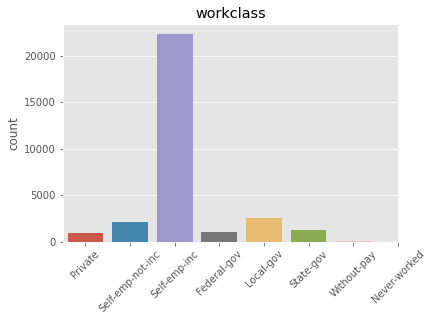

In [13]:
sns.countplot(data=data, x='workclass') # plot the union variable
plt.title('workclass')
plt.xlabel('') 
plt.xticks(ticks=[0,1,2,3,4,5,6,7],labels=['Private', 'Self-emp-not-inc', 'Self-emp-inc', 'Federal-gov', 'Local-gov', 'State-gov', 'Without-pay', 'Never-worked'],rotation=45)
plt.show() 

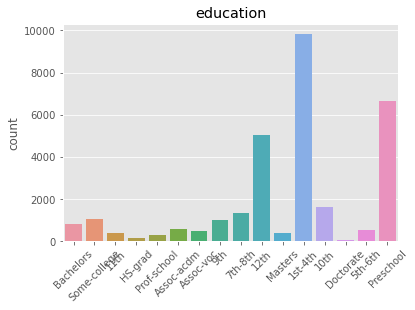

In [14]:
sns.countplot(data=data, x='education') # plot the union variable
plt.title('education')
plt.xlabel('') 
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],labels=['Bachelors', 'Some-college', '11th', 'HS-grad', 'Prof-school', 'Assoc-acdm',
                                           'Assoc-voc', '9th', '7th-8th', '12th', 'Masters', '1st-4th', '10th', 'Doctorate', '5th-6th', 
                                           'Preschool'],rotation=45)
plt.show() 

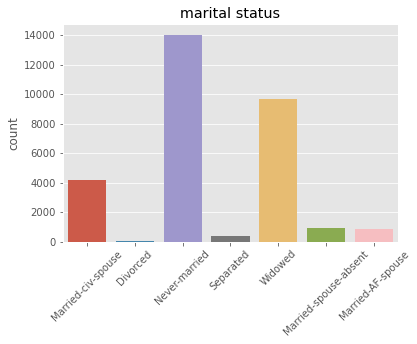

In [15]:
sns.countplot(data=data, x='marital') # plot the union variable
plt.title('marital status')
plt.xlabel('') 
plt.xticks(ticks=[0,1,2,3,4,5,6],labels=['Married-civ-spouse', 'Divorced', 'Never-married', 'Separated', 'Widowed', 
                                           'Married-spouse-absent', 'Married-AF-spouse'],rotation=45)
plt.show() 

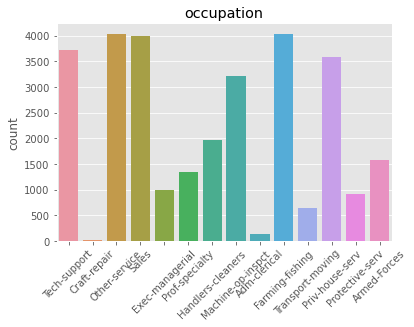

In [16]:
sns.countplot(data=data, x='occupation') # plot the union variable
plt.title('occupation')
plt.xlabel('') 
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13],labels=['Tech-support', 'Craft-repair', 'Other-service', 'Sales', 'Exec-managerial', 
                                         'Prof-specialty', 'Handlers-cleaners', 'Machine-op-inspct', 'Adm-clerical', 
                                         'Farming-fishing', 'Transport-moving', 'Priv-house-serv', 'Protective-serv', 
                                         'Armed-Forces'],rotation=45)
plt.show() 

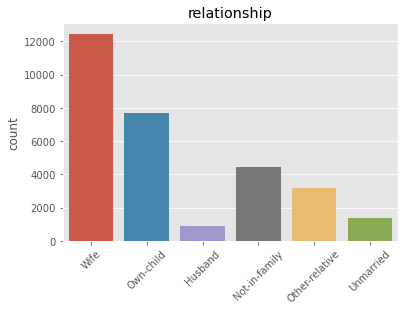

In [17]:
sns.countplot(data=data, x='relationship') # plot the union variable
plt.title('relationship')
plt.xlabel('') 
plt.xticks(ticks=[0,1,2,3,4,5],labels=['Wife', 'Own-child', 'Husband', 'Not-in-family', 'Other-relative', 
                                         'Unmarried'],rotation=45)
plt.show() 

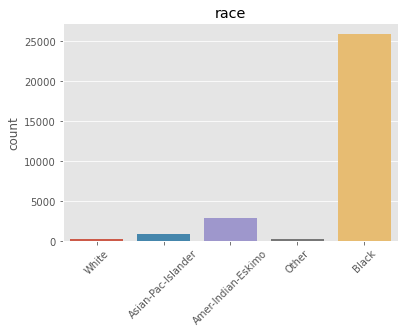

In [18]:
sns.countplot(data=data, x='race') # plot the union variable
plt.title('race')
plt.xlabel('') 
plt.xticks(ticks=[0,1,2,3,4],labels=['White', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other', 'Black'],rotation=45)
plt.show() 

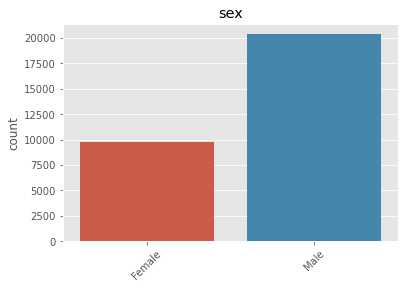

In [19]:
sns.countplot(data=data, x='sex') # plot the union variable
plt.title('sex')
plt.xlabel('') 
plt.xticks(ticks=[0,1],labels=['Female','Male'],rotation=45)
plt.show() 

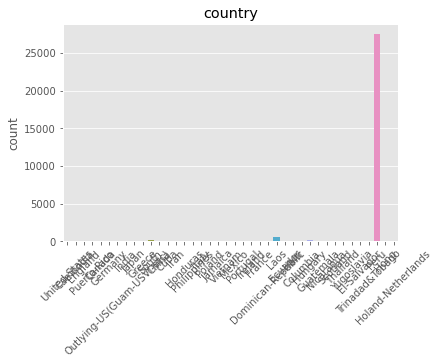

In [20]:
sns.countplot(data=data, x='country') # plot the union variable
plt.title('country')
plt.xlabel('') 
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,
                  34,35,36,37,38,39],labels=['United-States', 'Cambodia', 'England', 'Puerto-Rico', 'Canada', 'Germany', 
                                         'Outlying-US(Guam-USVI-etc)', 'India', 'Japan', 'Greece', 'South', 'China', 
                                         'Cuba','Iran', 'Honduras', 'Philippines', 'Italy', 'Poland', 'Jamaica', 'Vietnam', 'Mexico', 
                                         'Portugal', 'Ireland', 'France', 'Dominican-Republic', 'Laos', 'Ecuador', 
                                         'Haiti', 'Columbia', 'Hungary', 'Guatemala', 'Nicaragua', 'Scotland', 'Thailand', 
                                         'Yugoslavia', 'El-Salvador', 'Trinadad&Tobago', 'Peru', 'Hong', 'Holand-Netherlands'],rotation=45)
plt.show() 

In [21]:
print(data_org['country'].value_counts())

 United-States                 27487
 Mexico                          606
 Philippines                     188
 Germany                         128
 China                           110
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        61
 Japan                            59
 Columbia                         56
 Poland                           56
 Iran                             42
 Haiti                            42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                           29
 France                           27
 

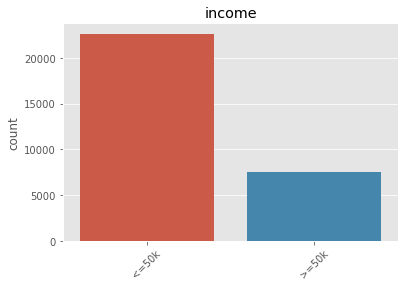

In [22]:
sns.countplot(data=data, x='income') # plot the union variable
plt.title('income')
plt.xlabel('') 
plt.xticks(ticks=[0,1],labels=['<=50k', '>=50k'],rotation=45)
plt.show() 

In [23]:
#to make it comparable, standardize
numeric_cols = ['age', 'fnlwgt', 'edu_num', 'capital_gain', 'capital_loss', 'hours_per_week']
scaler = StandardScaler()
for col in numeric_cols:
    data[col] = scaler.fit_transform(data[[col]].values)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30139 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30139 non-null  float64
 1   workclass       30139 non-null  int64  
 2   fnlwgt          30139 non-null  float64
 3   education       30139 non-null  int64  
 4   edu_num         30139 non-null  float64
 5   marital         30139 non-null  int64  
 6   occupation      30139 non-null  int64  
 7   relationship    30139 non-null  int64  
 8   race            30139 non-null  int64  
 9   sex             30139 non-null  int64  
 10  capital_gain    30139 non-null  float64
 11  capital_loss    30139 non-null  float64
 12  hours_per_week  30139 non-null  float64
 13  country         30139 non-null  int64  
 14  income          30139 non-null  int64  
dtypes: float64(6), int64(9)
memory usage: 3.7 MB


In [24]:
data.head()

,age,workclass,fnlwgt,education,edu_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,income
0,0.0425,5,-1.0627,9,1.1290,4,0,1,4,1,0.1459,-0.2187,-0.0780,37,0
1,0.8802,4,-1.0078,9,1.1290,2,3,0,4,1,-0.1475,-0.2187,-2.3321,37,0
2,-0.0336,2,0.2447,11,-0.4404,0,5,1,4,1,-0.1475,-0.2187,-0.0780,37,0
3,1.1087,2,0.4252,1,-1.2251,2,5,0,2,1,-0.1475,-0.2187,-0.0780,37,0
4,-0.7952,2,1.4066,9,1.1290,2,9,5,2,0,-0.1475,-0.2187,-0.0780,4,0


In [25]:
summary=data.describe().round(2)  # generate summary statistics, and round everything to 2 decimal degrees
summary=summary.T #.T transposes the table (rows become columns and vice versa)
summary

,count,mean,std,min,25%,50%,75%,max
age,"30,139.0000",0.0000,1.0000,-1.6300,-0.8000,-0.1100,0.6500,3.9300
workclass,"30,139.0000",2.2000,0.9500,0.0000,2.0000,2.0000,2.0000,6.0000
fnlwgt,"30,139.0000",-0.0000,1.0000,-1.6700,-0.6800,-0.1100,0.4500,12.2600
education,"30,139.0000",10.3300,3.8100,0.0000,9.0000,11.0000,12.0000,15.0000
edu_num,"30,139.0000",0.0000,1.0000,-3.5800,-0.4400,-0.0500,1.1300,2.3100
marital,"30,139.0000",2.5800,1.5000,0.0000,2.0000,2.0000,4.0000,6.0000
occupation,"30,139.0000",5.9600,4.0300,0.0000,2.0000,6.0000,9.0000,13.0000
relationship,"30,139.0000",1.4200,1.6000,0.0000,0.0000,1.0000,3.0000,5.0000
race,"30,139.0000",3.6800,0.8300,0.0000,4.0000,4.0000,4.0000,4.0000
sex,"30,139.0000",0.6800,0.4700,0.0000,0.0000,1.0000,1.0000,1.0000


The summary statistics table provides us with a good overview of some of the variables we're interested in. However, you'll notice that it omits many of the other variables in our dataset: the categorical ones. This is because calculating the mean, standard deviation, etc. of something like the "occupation" column doesn't really make sense. For that, we turn to visualization.

# Methodology

In [26]:
X = data.drop(['income'], axis = 1)
income = data['income']

In [49]:
logreg = LogisticRegression()
logreg.fit(X, income)
y_pred=logreg.predict(X)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


------------------------------------------
Print the model:
age : 0.45332219632585313
workclass : -0.12053612508622287
fnlwgt : 0.051192007562625444
education : 0.01781336379548908
edu_num : 0.8258198000313188
marital : -0.21967304014294953
occupation : -0.001326286597562123
relationship : -0.13356852742708936
race : 0.09903988747116774
sex : 0.821153025595385
capital_gain : 2.4088145018561278
capital_loss : 0.2777374287544041
hours_per_week : 0.3548057223036181
country : -0.004522077963938876
------------------------------------------
Accuracy of the model is: 0.8192707123660373
The confusion matrix is:


<AxesSubplot:>

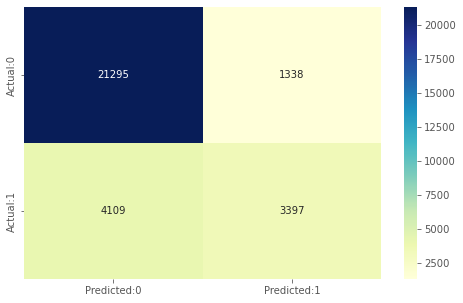

In [53]:
print("------------------------------------------")
print("Print the model:")
coef_dict = {}
for coef, feat in zip(logreg.coef_.flatten().tolist(),X.columns):
    coef_dict[feat] = coef
    print(feat, ":", coef)
print("------------------------------------------")
    
acc = sklearn.metrics.accuracy_score(income,y_pred)
print("Accuracy of the model is: " + str(acc))

# Another evaluation: confusion matrix
print("The confusion matrix is:")
cm=confusion_matrix(income,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [28]:
X_dict = X.to_dict('records')
print(X_dict[0])

{'age': 0.042515506897587416, 'workclass': 5, 'fnlwgt': -1.0626760419550594, 'education': 9, 'edu_num': 1.128995981400911, 'marital': 4, 'occupation': 0, 'relationship': 1, 'race': 4, 'sex': 1, 'capital_gain': 0.14592530644158153, 'capital_loss': -0.21867335078526204, 'hours_per_week': -0.0780313310622559, 'country': 37}


In [29]:
vec = DictVectorizer()
X_matrix = vec.fit_transform(X_dict)

In [30]:
print(vec.feature_names_[0:5])
print(vec.vocabulary_)

['age', 'capital_gain', 'capital_loss', 'country', 'edu_num']
{'age': 0, 'workclass': 13, 'fnlwgt': 6, 'education': 5, 'edu_num': 4, 'marital': 8, 'occupation': 9, 'relationship': 11, 'race': 10, 'sex': 12, 'capital_gain': 1, 'capital_loss': 2, 'hours_per_week': 7, 'country': 3}


In [31]:
X_array = X_matrix.toarray()
print(X_array.shape)
print(type(X_array))

(30139, 14)
<class 'numpy.ndarray'>


In [32]:
random_state_split = 100
train_x, test_x, train_y, test_y = train_test_split(X_array,income, random_state=random_state_split)

In [33]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(22604, 14)
(22604,)
(7535, 14)
(7535,)


## CART

default cart

In [34]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(train_x, train_y)
pred = clf.predict(test_x)

In [35]:
score_train = clf.score(train_x, train_y)
score_train

1.0

In [36]:
score_test = clf.score(test_x, test_y)
score_test

0.8114134041141341

In [37]:
clf.get_depth()

48

tuning

In [38]:
hyperparameters = {'max_depth':[30,50,70,90,110], 'min_samples_split':[10,12,14,16,18]}

randomState_dt = 10000
dt = DecisionTreeClassifier(random_state=randomState_dt)

# cv=5 by default, which means 5-fold cross-validation
clf_1 = GridSearchCV(dt, hyperparameters)

clf_1.fit(train_x, train_y)

# we can query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (clf_1.best_params_)
print ("The best score is: ")
print (clf_1.best_score_)

The best parameter value is: 
{'max_depth': 30, 'min_samples_split': 16}
The best score is: 
0.8242789695286306


In [39]:
print(clf_1.score(test_x,test_y))

0.8272063702720637


In [40]:
test = []
for i in range(30,110,10):
    clf_test = DecisionTreeClassifier(random_state=10000 ,max_depth=i,min_samples_split=16)
    clf_test = clf_test.fit(train_x,train_y)
    score = clf_test.score(test_x,test_y)
    test.append(score)

[0.8272063702720637, 0.8264100862641008, 0.8262773722627738, 0.8262773722627738, 0.8262773722627738, 0.8262773722627738, 0.8262773722627738, 0.8262773722627738]


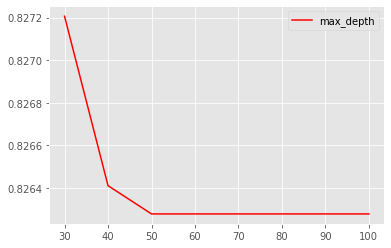

In [41]:
print(test)
plt.plot(test,color='red',label ='max_depth')
plt.xticks(ticks=[0,1,2,3,4,5,6,7],labels = ['30','40','50','60','70','80','90','100'])
plt.legend()
plt.show()

In [42]:
decision_tree =DecisionTreeClassifier(max_depth=clf_1.best_params_['max_depth'], min_samples_split=clf_1.best_params_['min_samples_split'], random_state=randomState_dt)
decision_tree.fit(train_x, train_y)

DecisionTreeClassifier(max_depth=30, min_samples_split=16, random_state=10000)

In [43]:
print("Score on the training data:")
print(decision_tree.score(X=train_x, y=train_y))
print("Score on the testing data:")
print(decision_tree.score(X=test_x, y=test_y))

Score on the training data:
0.9210759157671209
Score on the testing data:
0.8272063702720637


In [44]:
print("RMSE on the training data:")
print(mean_squared_error(train_y, decision_tree.predict(train_x), squared=False))
print("RMSE on the testing data:")
print(mean_squared_error(test_y, decision_tree.predict(test_x), squared=False))

RMSE on the training data:
0.28093430590242824
RMSE on the testing data:
0.41568453149947293


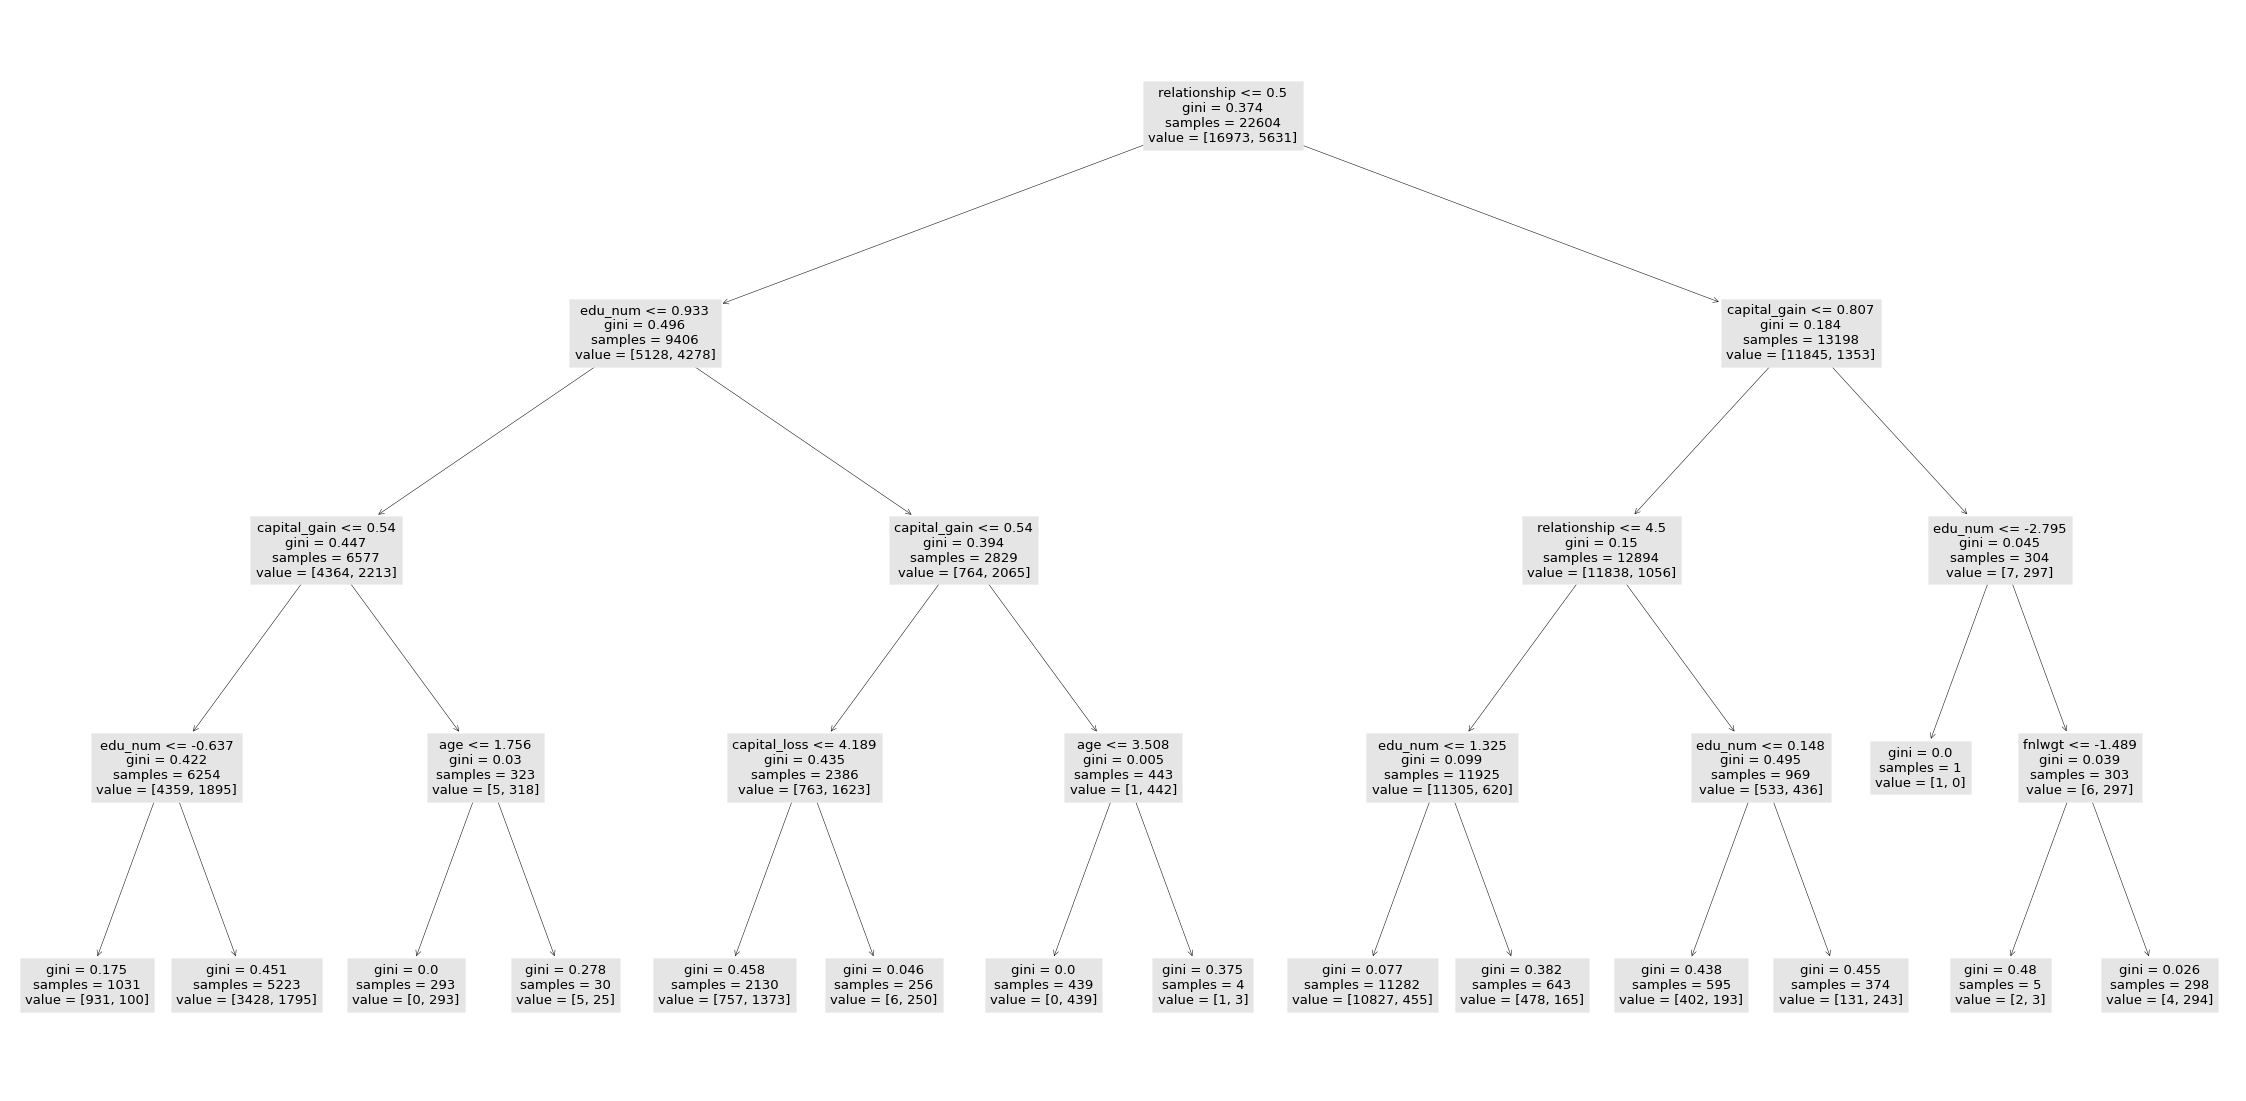

In [45]:
decision_tree = DecisionTreeClassifier(max_depth=4)
decision_tree.fit(train_x, train_y)
plt.figure(figsize=(40,20))

_ = tree.plot_tree(decision_tree, feature_names = vec.feature_names_)
plt.show()

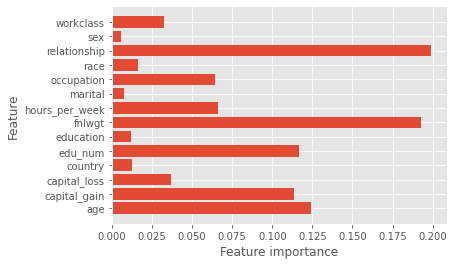

In [46]:
plt.barh(range(X.shape[1]), clf.feature_importances_, align='center')
    
plt.yticks((0,1,2,3,4,5,6,7,8,9,10,11,12,13), vec.feature_names_)
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

## RF

In [47]:
forest = RandomForestClassifier(n_estimators=100, random_state=0)    
forest.fit(train_x, train_y) 
print('Accuracy on training set: {:.3f}'.format(forest.score(train_x, train_y)))
print('Accuracy on test set: {:.3f}'.format(forest.score(test_x,test_y)))       

Accuracy on training set: 1.000
Accuracy on test set: 0.854


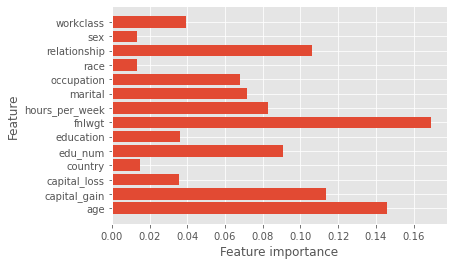

In [48]:
plt.barh(range(X.shape[1]), forest.feature_importances_, align='center')
    
plt.yticks((0,1,2,3,4,5,6,7,8,9,10,11,12,13), vec.feature_names_)
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

# References

Kohavi,Ron. (1996). Census Income. UCI Machine Learning Repository. https://doi.org/10.24432/C5S595.